analyse des Transactions et Cartes Prepayées

ce projet vise à analyser les données transactionnelles des cartes prépayées utilisées dans le secteur de la restauration rapide. L'analyse comprend l'extraction des tendances, la détection des comportements clients, l'identification des anomalies, ainsi que la visualisation des données pour faciliter la prise de décision.

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('Downloads/REGLEMENTS_CARTES_PREPAYEES_FAST_FOOD (2) (1).csv')

In [9]:
#affichage des premieres lignes pour comprendre la structure des donnees
df.head()

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Bénéficiaire_CPP,Solde_CPP,ID_Restaurant,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,MOUMOUN,952.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,FARAIDI,921.51,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,RACHIDI Salah,790.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,EL AZRAK,346.23,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22
4,282972,700874999,2024-02-22,11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,ZERIOUEL,875.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Règlement      15222 non-null  int64  
 1   ID_Operation      15222 non-null  int64  
 2   Date_Règlement    15222 non-null  object 
 3   Heure_Règlement   15222 non-null  object 
 4   Paiement          15222 non-null  object 
 5   Référence         99 non-null     float64
 6   Montant_Rgl       15222 non-null  float64
 7   Montant_Versé     15222 non-null  float64
 8   Montant_Rst       15222 non-null  float64
 9   ID_Client         10690 non-null  object 
 10  Client            10690 non-null  object 
 11  ID_CartePP        15222 non-null  object 
 12  Bénéficiaire_CPP  14668 non-null  object 
 13  Solde_CPP         15222 non-null  float64
 14  ID_Restaurant     15222 non-null  object 
 15  Restaurant        15222 non-null  object 
 16  ID_User           15221 non-null  object

In [13]:
print(f'rows:{df.shape[0]} columns:{df.shape[1]}')

rows:15222 columns:22


In [15]:
# conversion de la colonne 'Date_Règlement' en format datetime
df['Date_Règlement'] = pd.to_datetime(df['Date_Règlement'], format='%Y-%m-%d')

# conversion de la colonne 'Heure_Règlement' en format time
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S').dt.time

# conversion des colonnes numériques ('Montant_Rgl', 'Montant_Rst', 'Solde_CPP') en types numériques
df['Montant_Rgl'] = pd.to_numeric(df['Montant_Rgl'], errors='coerce')
df['Montant_Rst'] = pd.to_numeric(df['Montant_Rst'], errors='coerce')
df['Solde_CPP'] = pd.to_numeric(df['Solde_CPP'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Règlement      15222 non-null  int64         
 1   ID_Operation      15222 non-null  int64         
 2   Date_Règlement    15222 non-null  datetime64[ns]
 3   Heure_Règlement   15222 non-null  object        
 4   Paiement          15222 non-null  object        
 5   Référence         99 non-null     float64       
 6   Montant_Rgl       15222 non-null  float64       
 7   Montant_Versé     15222 non-null  float64       
 8   Montant_Rst       15222 non-null  float64       
 9   ID_Client         10690 non-null  object        
 10  Client            10690 non-null  object        
 11  ID_CartePP        15222 non-null  object        
 12  Bénéficiaire_CPP  14668 non-null  object        
 13  Solde_CPP         15222 non-null  float64       
 14  ID_Restaurant     1522

In [19]:
# Créer les colonnes year, month et week

df['year'] = df['Date_Règlement'].dt.year
df['month'] = df['Date_Règlement'].dt.month
df['week'] = df['Date_Règlement'].dt.isocalendar().week


In [21]:
df.head()

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys,year,month,week
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29,2024,2,9
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29,2024,2,9
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29,2024,2,9
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22,2024,2,8
4,282972,700874999,2024-02-22,11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22,2024,2,8


In [23]:
# groupement des transactions par jour, semaine et mois
df_month=df.groupby('month')['Montant_Rgl'].sum().reset_index()
df_week=df.groupby('week')['Montant_Rgl'].sum().reset_index()
df_day=df.groupby('Date_Règlement')['Montant_Rgl'].sum().reset_index()

In [25]:
df_month

,month,Montant_Rgl
0,1,88552.516991
1,2,89719.960037
2,3,66291.826827
3,4,51492.081983
4,5,102934.501750
5,6,78728.774981
6,7,13531.747995
7,8,18340.800014
8,9,7263.990002


In [27]:
df_day

,Date_Règlement,Montant_Rgl
0,2024-01-01,2185.500000
1,2024-01-02,3928.500000
2,2024-01-03,3614.500000
3,2024-01-04,3856.000000
4,2024-01-05,3912.500000
...,...,...
238,2024-08-31,1402.550002
239,2024-09-01,2100.400002
240,2024-09-02,2816.700000
241,2024-09-03,2135.890000


J'ai regroupé les données par périodes journalières, hebdomadaires et mensuelles afin d'analyser les tendances des transactions

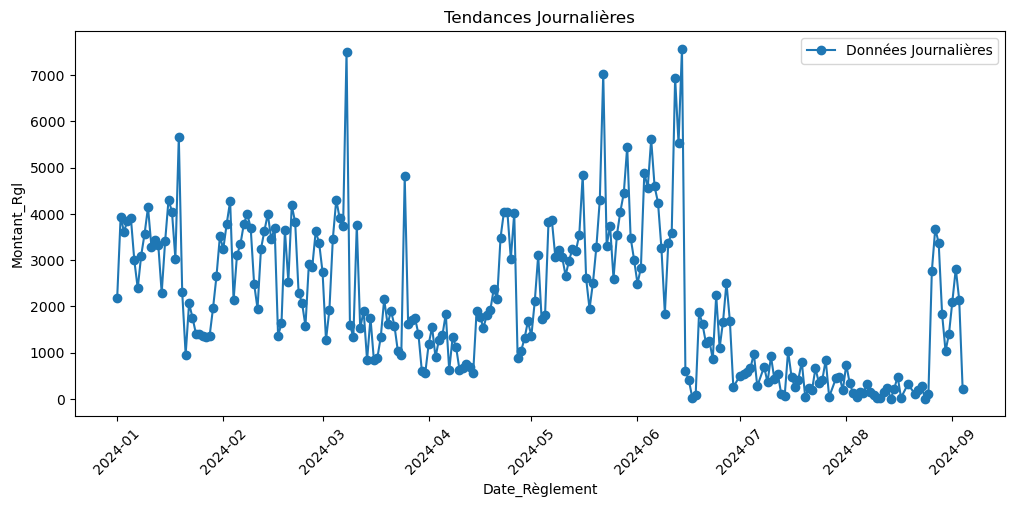

In [30]:
plt.figure(figsize=(12,5))
plt.plot(df_day['Date_Règlement'], df_day['Montant_Rgl'], label='Données Journalières',marker='o')
plt.title('Tendances Journalières')
plt.xlabel('Date_Règlement')
plt.ylabel('Montant_Rgl')
plt.xticks(rotation=45)
plt.legend()
plt.show()


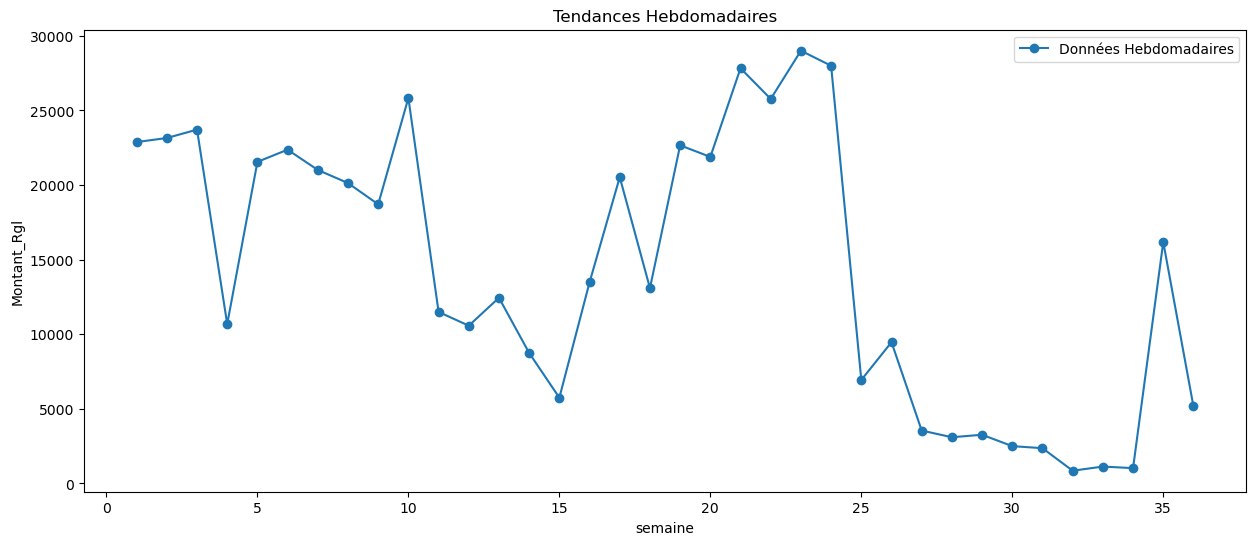

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(df_week['week'], df_week['Montant_Rgl'], label='Données Hebdomadaires',marker='o')
plt.title('Tendances Hebdomadaires')
plt.xlabel('semaine')
plt.ylabel('Montant_Rgl')
plt.legend()
plt.show()


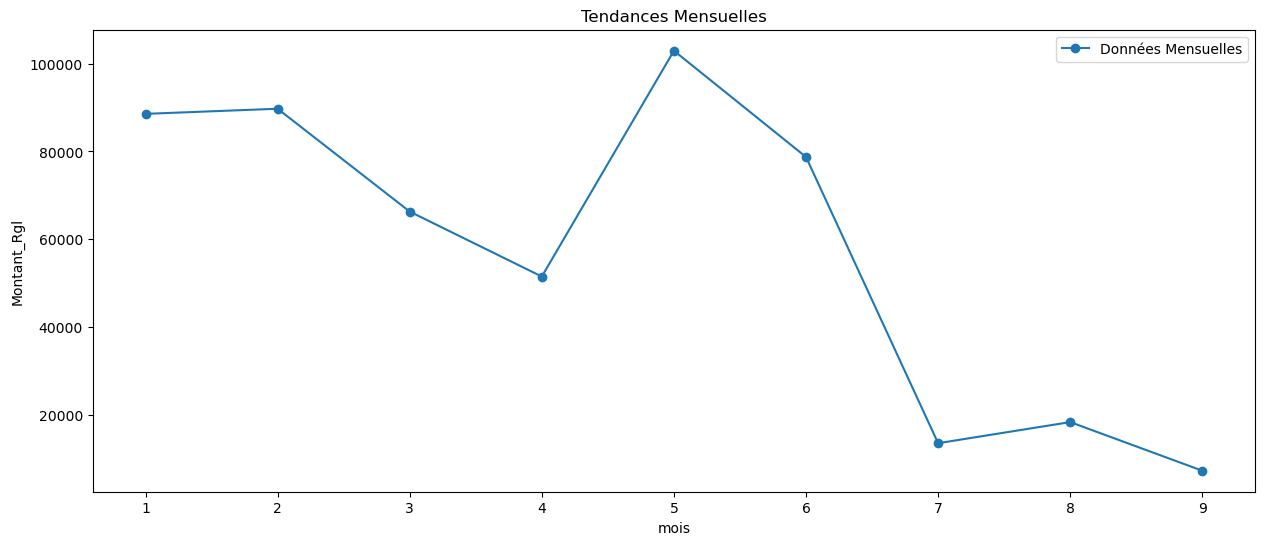

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(df_month['month'], df_month['Montant_Rgl'], label='Données Mensuelles',marker='o')
plt.title('Tendances Mensuelles')
plt.xlabel('mois')
plt.ylabel('Montant_Rgl')
plt.legend()
plt.show()

In [36]:
# Grouper par date et calculer la moyenne des soldes des cartes prepayees
df_date_solde=df.groupby('Date_Règlement')['Solde_CPP'].mean().reset_index()

In [38]:
df_date_solde

,Date_Règlement,Solde_CPP
0,2024-01-01,439.178961
1,2024-01-02,440.285789
2,2024-01-03,540.354962
3,2024-01-04,403.749808
4,2024-01-05,478.238156
...,...,...
238,2024-08-31,1445.607778
239,2024-09-01,1296.824390
240,2024-09-02,1042.206794
241,2024-09-03,958.314902


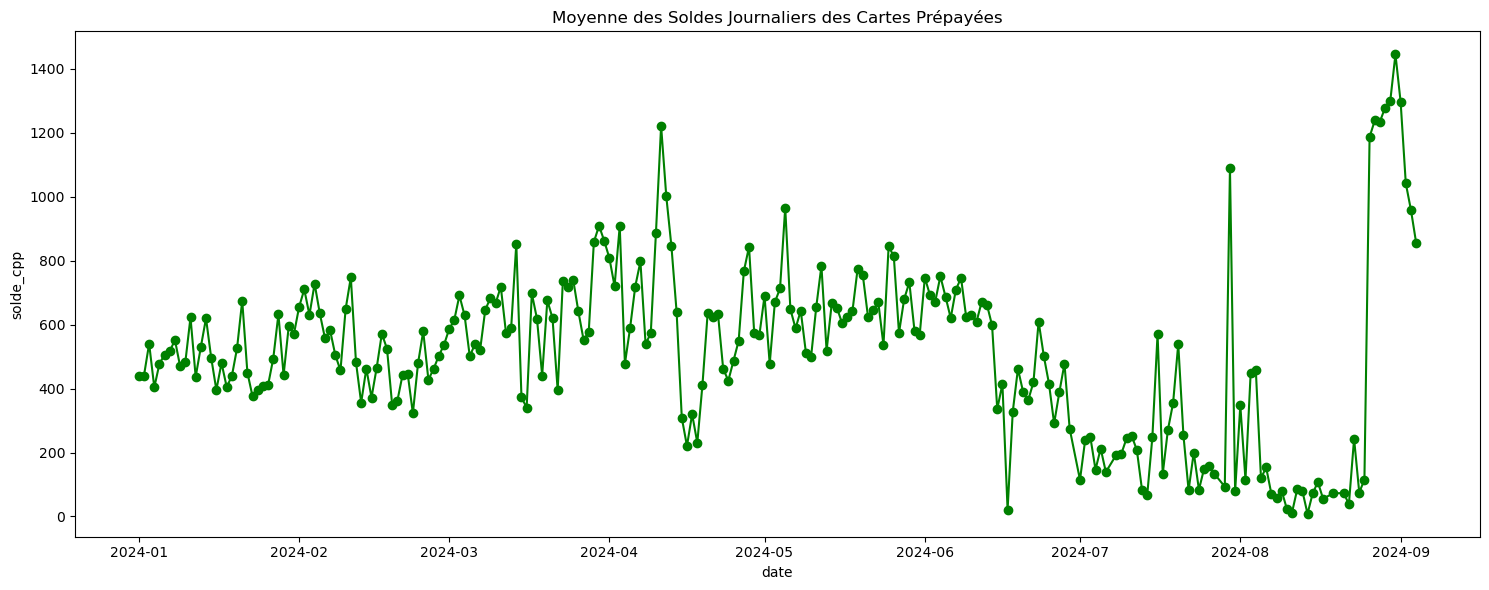

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(df_date_solde['Date_Règlement'], df_date_solde['Solde_CPP'],marker='o',color='green')
plt.title('Moyenne des Soldes Journaliers des Cartes Prépayées')
plt.xlabel('date')
plt.ylabel('solde_cpp')
plt.tight_layout()
plt.show()

In [42]:
# Calculer les 10 plus gros dépensiers
df_total_depenses_clients=df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index().sort_values(by='Montant_Rgl', ascending=False).head(10)
# Calculer la dépense moyenne par client
df_moyenne_depenses_clients=df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].mean().reset_index().sort_values(by='Montant_Rgl', ascending=False).head(10)
# Calculer le solde moyen  pour les clients les plus dépensiers
df_soldes_clients=df.groupby('Bénéficiaire_CPP')['Solde_CPP'].mean().reset_index()
df_soldes_clients=pd.merge(df_soldes_clients, df_total_depenses_clients, how='outer', on='Bénéficiaire_CPP').sort_values(by='Montant_Rgl', ascending=False).head(10)


In [44]:
df_total_depenses_clients

,Bénéficiaire_CPP,Montant_Rgl
735,RIFAI,17737.572536
230,CHAGH,12992.532396
764,SELMANI,12726.843949
192,BOUICHENADE,11338.000000
728,REGRAGUI,10653.672295
277,DOUDOUH,10428.100000
374,EL YAAGOUBI,10137.209394
631,MINTOAMA,9119.000000
366,EL MOUNTADAR,8889.065796
805,ZAABOUL,8840.296894


In [46]:
df_moyenne_depenses_clients

,Bénéficiaire_CPP,Montant_Rgl
735,RIFAI,347.795540
497,HOUSNI,298.506000
72,AROUKI,270.000000
26,ADOU MARIE,188.333333
726,RAZOUK,176.000000
365,EL MOUKTARID,129.400000
103,BARAKA KAMAVU,122.000000
606,MAHIR,117.500000
652,MPOLO,110.000000
762,SEKKATE,110.000000


In [48]:
df_soldes_clients

,Bénéficiaire_CPP,Solde_CPP,Montant_Rgl
735,RIFAI,1436.969608,17737.572536
230,CHAGH,1044.261937,12992.532396
764,SELMANI,1111.022196,12726.843949
192,BOUICHENADE,1150.418056,11338.000000
728,REGRAGUI,1302.024497,10653.672295
277,DOUDOUH,894.268015,10428.100000
374,EL YAAGOUBI,1170.903710,10137.209394
631,MINTOAMA,1181.766010,9119.000000
366,EL MOUNTADAR,1240.899716,8889.065796
805,ZAABOUL,782.729490,8840.296894


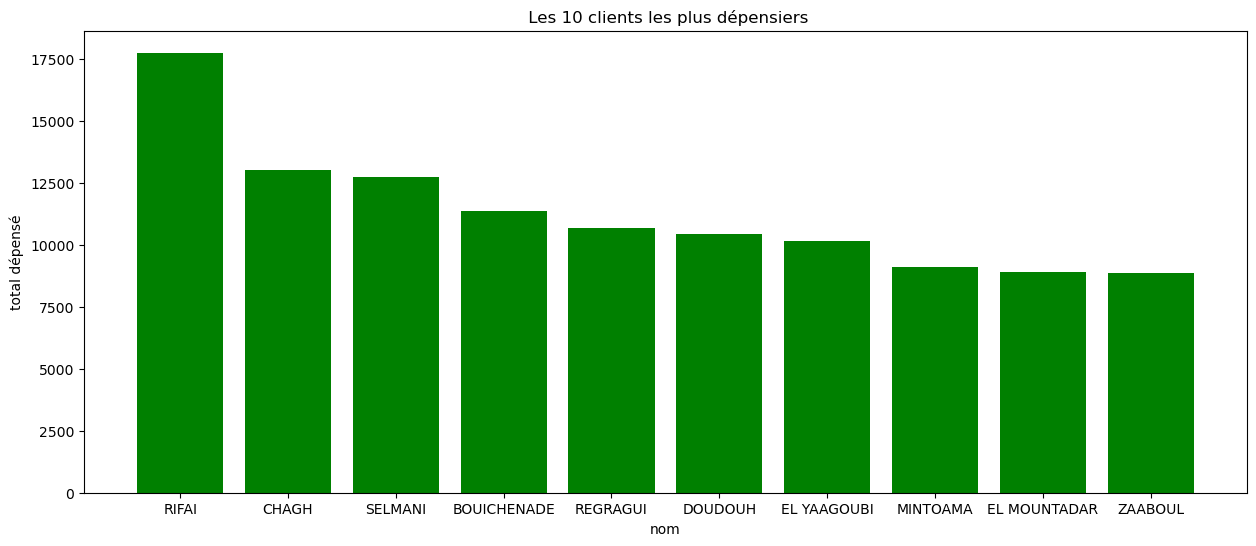

In [50]:
#Créer pour les 10 plus gros dépensiers
plt.figure(figsize=(15, 6))
plt.bar(df_total_depenses_clients['Bénéficiaire_CPP'], df_total_depenses_clients['Montant_Rgl'],color='green')
plt.title(' Les 10 clients les plus dépensiers')
plt.xlabel('nom')
plt.ylabel('total dépensé')
plt.show()

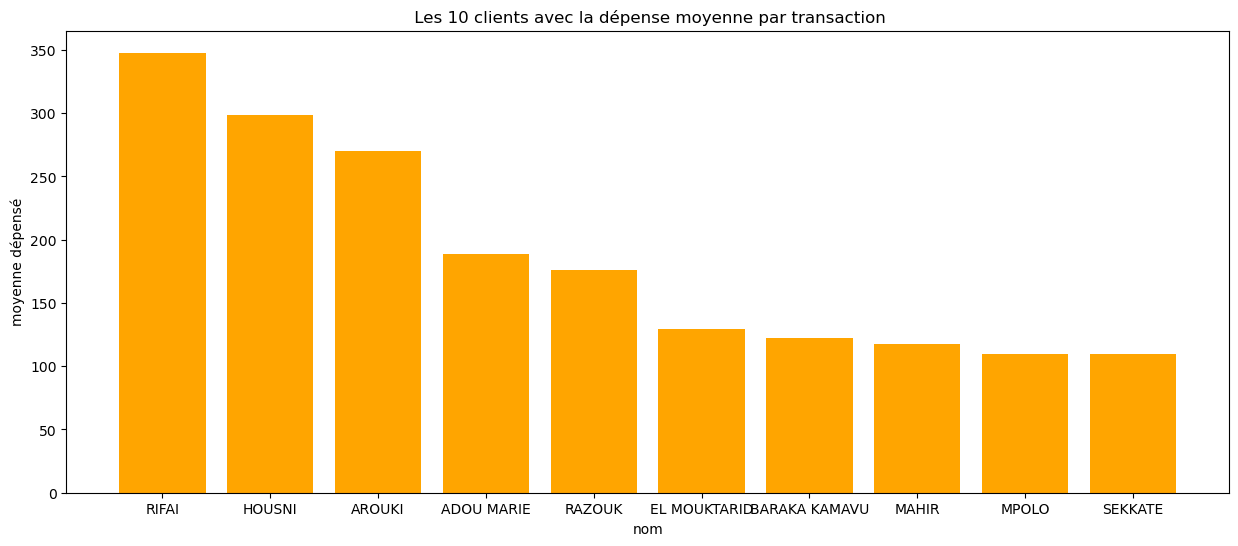

In [52]:
# créer graphe pour dépense moyenne par client
plt.figure(figsize=(15, 6))
plt.bar(df_moyenne_depenses_clients['Bénéficiaire_CPP'], df_moyenne_depenses_clients['Montant_Rgl'],color='orange')
plt.title(' Les 10 clients avec la dépense moyenne par transaction')
plt.xlabel('nom')
plt.ylabel('moyenne dépensé')
plt.show()

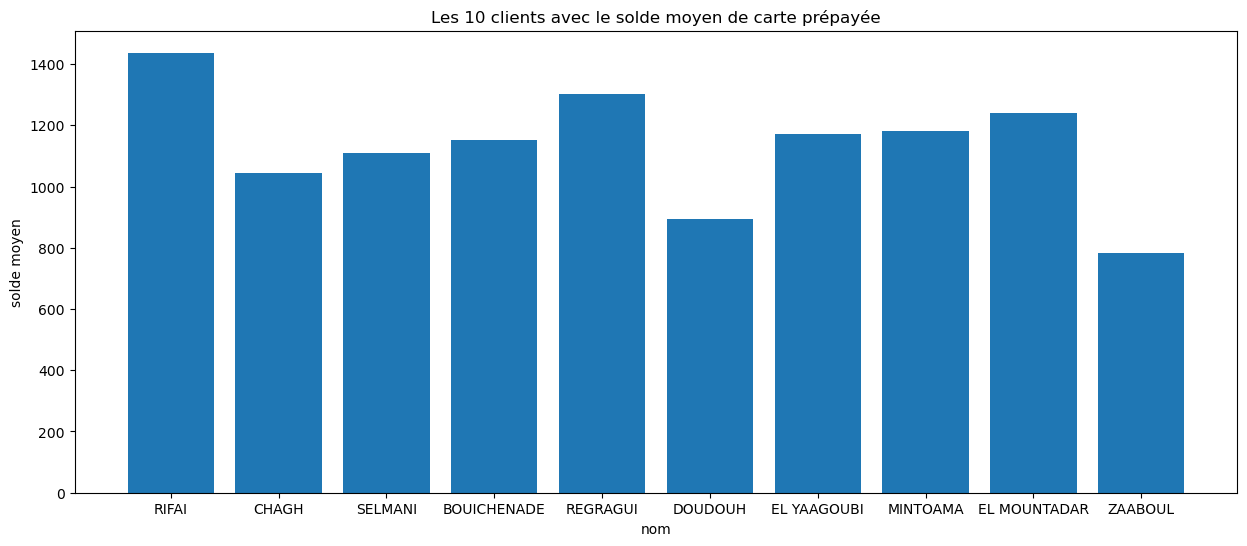

In [54]:
#créer graphe pur le solde moyen  pour les clients les plus dépensiers
plt.figure(figsize=(15, 6))
plt.bar(df_soldes_clients['Bénéficiaire_CPP'],df_soldes_clients['Solde_CPP'])
plt.title('Les 10 clients avec le solde moyen de carte prépayée')
plt.xlabel('nom')
plt.ylabel('solde moyen')
plt.show()

In [56]:
#Filtrer les transactions 
df_unpaid = df[df['Montant_Rst'] > 0]
df_unpaid = df_unpaid.groupby('Bénéficiaire_CPP')['Montant_Rst'].sum().reset_index()
df_zero_balance = df[df['Solde_CPP'] == 0]

In [58]:
df_unpaid

,Bénéficiaire_CPP,Montant_Rst
0,AKDI,2.486900e-13
1,AMEZIANE,9.536743e-07
2,AQEL,4.618528e-14
3,BADSSI,4.014566e-13
4,Bentaleb,4.618528e-14
5,CHAGH,1.907349e-06
6,CHERKAOUI EL,9.237056e-14
7,DIOURI,9.536743e-07
8,DOUDOUH,1.907349e-06
9,EL AOUNI,4.156675e-13


In [60]:
df_zero_balance 

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys,year,month,week


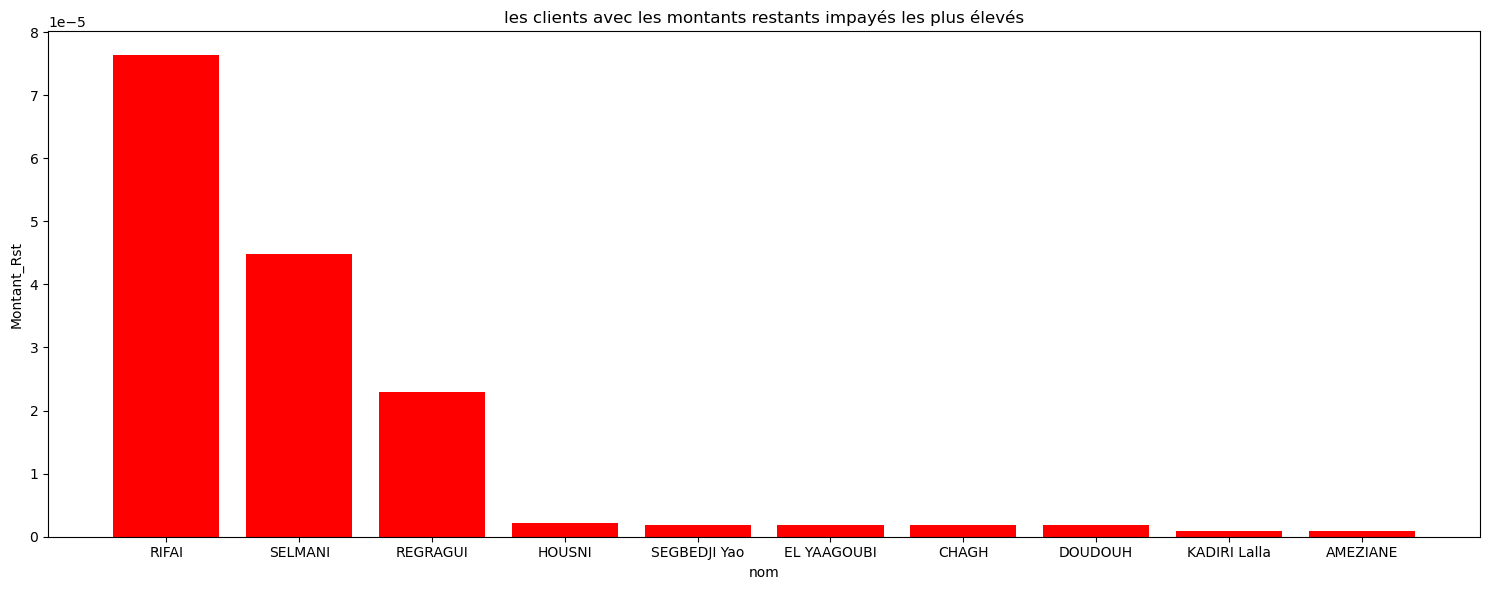

In [62]:
# graphe pour visualiser les clients avec les montants restants impayés les plus élevés
df_unpaid=df_unpaid.sort_values(by='Montant_Rst', ascending=False).head(10)

plt.figure(figsize=(15, 6))
plt.bar(df_unpaid['Bénéficiaire_CPP'],df_unpaid['Montant_Rst'],color='red')
plt.title('les clients avec les montants restants impayés les plus élevés')
plt.xlabel('nom')
plt.ylabel('Montant_Rst')
plt.tight_layout()
plt.show()

In [64]:
df_unpaid

,Bénéficiaire_CPP,Montant_Rst
24,RIFAI,7.629394e-05
27,SELMANI,4.482269e-05
23,REGRAGUI,2.288818e-05
16,HOUSNI,2.145767e-06
26,SEGBEDJI Yao,1.907349e-06
13,EL YAAGOUBI,1.907349e-06
5,CHAGH,1.907349e-06
8,DOUDOUH,1.907349e-06
18,KADIRI Lalla,9.536743e-07
1,AMEZIANE,9.536743e-07


In [66]:
#calculer les transactions par restaurant  et en calculant les revenus totaux
df_restaurant_revenus_totaux=df.groupby('Restaurant')['Montant_Rgl'].sum().reset_index(name='Total_Revenue')

In [68]:
df_restaurant_revenus_totaux

,Restaurant,Total_Revenue
0,Café - Boulangerie - Pâtisserie - Rabat,183514.500000
1,Epicerie - Rabat,7903.250010
2,L'Casis Cafétéria HCZ,21571.500000
3,Lavomatic - Rabat,46274.139999
4,Pharmacie & Parapharmacie - Rabat,33323.810572
5,Restaurant Gastronomique - Rabat,16405.000000
6,Snack Pizzeria - Rabat,207864.000000


In [70]:
#créer colone pour heure
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S')
df['Heure'] = df['Heure_Règlement'].dt.hour
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S').dt.time

In [72]:
df['Heure']

0         8
1         8
2         8
3        11
4        11
         ..
15217    10
15218    10
15219    10
15220    11
15221    11
Name: Heure, Length: 15222, dtype: int32

In [74]:
# heures de pointe
df_heures_pointe=df.groupby('Heure')['ID_Operation'].count().reset_index(name='Count')

In [76]:
df_heures_pointe

,Heure,Count
0,1,4
1,4,3
2,6,5
3,7,327
4,8,646
5,9,1107
6,10,1445
7,11,824
8,12,2077
9,13,947


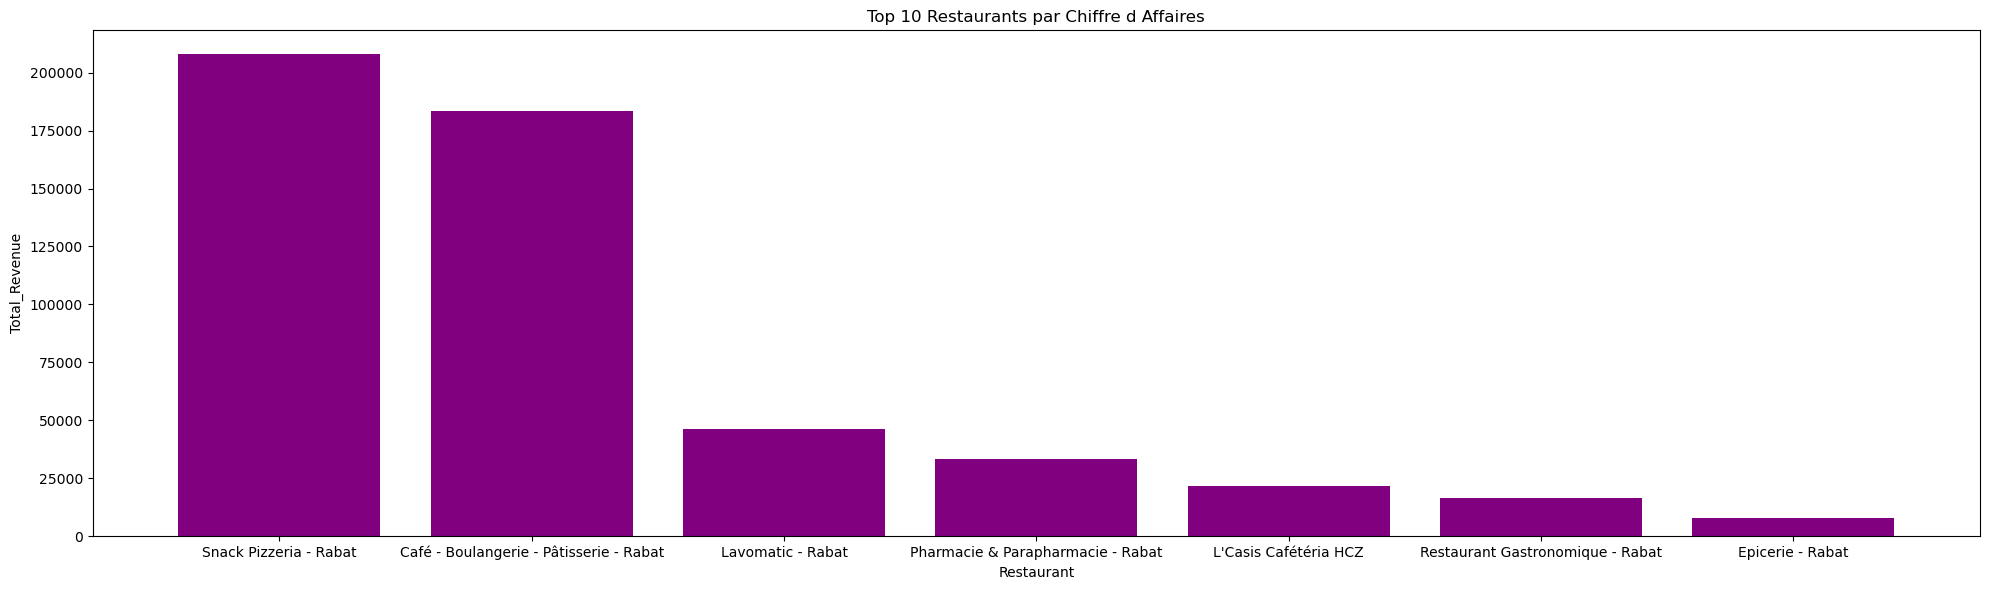

In [78]:
# graphe pour visualiser les restaurants les plus performants par chiffre d'affaires et les heures de pointe des transactions.
df_restaurant_revenus_totaux=df_restaurant_revenus_totaux.sort_values(by='Total_Revenue', ascending=False).head(10)
plt.figure(figsize=(20, 6))
plt.bar(df_restaurant_revenus_totaux['Restaurant'],df_restaurant_revenus_totaux['Total_Revenue'],color='purple')
plt.title('Top 10 Restaurants par Chiffre d Affaires')
plt.xlabel('Restaurant')
plt.ylabel('Total_Revenue')
plt.tight_layout()
plt.show()

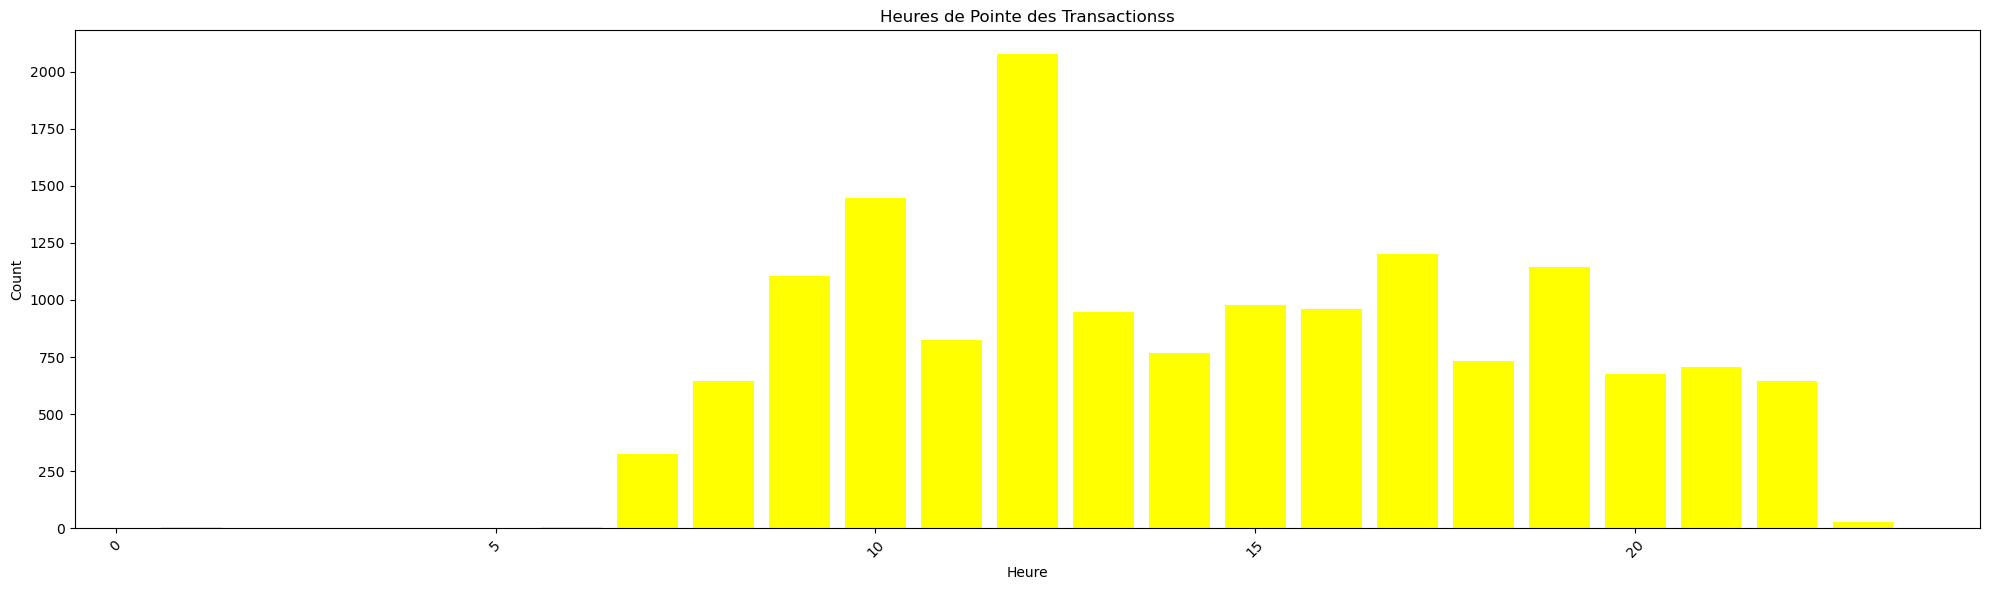

In [80]:
plt.figure(figsize=(20, 6))
plt.bar(df_heures_pointe['Heure'],df_heures_pointe['Count'],color='yellow')
plt.title('Heures de Pointe des Transactionss')
plt.xlabel('Heure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
# Detection des anomalies dans les montants des transactions en utilisant l ecart interquartile (IQR)
Q1 = df['Montant_Rgl'].quantile(0.25)
Q3 = df['Montant_Rgl'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
Limite_inf= Q1 - 1.5 * IQR
limite_sup= Q3 + 1.5  *IQR

# Identification des valeurs aberrantes
df_Valeurs_anormales = df[(df['Montant_Rgl'] < Limite_inf) | (df['Montant_Rgl'] > limite_sup)]


In [84]:
df_Valeurs_anormales

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys,year,month,week,Heure
71,288239,700877453,2024-02-29,10:49:57,Carte prépayée,NaN,99.500000,99.500000,0.000000e+00,CLT10001,...,USR10004,Hamza,Caissier,Validé,False,2024-02-29,2024,2,9,10
131,288404,501511858,2024-02-29,12:27:34,Carte prépayée,NaN,100.000000,100.000000,0.000000e+00,CLT10002,...,USR10022,Fadwa,Caissier,Validé,False,2024-02-29,2024,2,9,12
169,283498,400440939,2024-02-22,18:43:09,Carte prépayée,NaN,110.000000,110.000000,0.000000e+00,NaN,...,USR10001,Ayoub,Caissier,Validé,False,2024-02-22,2024,2,8,18
170,283499,901000389,2024-02-22,18:50:52,Carte prépayée,3.751366e+15,971.572010,971.572021,-1.144409e-05,CLT10002,...,USR10026,Kawtar,Caissier,Validé,False,2024-02-22,2024,2,8,18
181,286528,501511848,2024-02-27,12:32:42,Carte prépayée,NaN,200.000000,200.000000,0.000000e+00,CLT10002,...,USR10022,Fadwa,Caissier,Validé,False,2024-02-27,2024,2,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14682,383843,901003237,2024-08-28,15:20:11,Carte prépayée,4.293358e+15,297.600006,297.600006,3.979039e-13,CLT10002,...,USR10028,Mourad,Caissier,Validé,False,2024-08-28,2024,8,35,15
14763,384471,550502224,2024-08-29,14:02:20,Carte prépayée,NaN,105.000000,105.000000,0.000000e+00,NaN,...,USR10002,Souhail,Caissier,Validé,False,2024-08-29,2024,8,35,14
14789,384720,550502229,2024-08-29,21:10:47,Carte prépayée,NaN,128.000000,128.000000,0.000000e+00,NaN,...,USR10008,Souhail,Caissier,Validé,False,2024-08-29,2024,8,35,21
14856,385550,906104824,2024-08-31,11:44:30,Carte prépayée,NaN,186.300003,186.300003,1.989520e-13,CLT10001,...,USR10030,Abdelkrim,Caissier,Validé,False,2024-08-31,2024,8,35,11


J'ai utilisé la méthode de l'écart interquartile (IQR) pour détecter les anomalies dans les montants des transactions

In [87]:
#Grouper les anomalies par client, restaurant et heure
df_Valeurs_anormales_grouped_clients = df_Valeurs_anormales.groupby('Bénéficiaire_CPP').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(12)
df_Valeurs_anormales_grouped_restaurant = df_Valeurs_anormales.groupby('Restaurant').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(15)
df_Valeurs_anormales_grouped_heure = df_Valeurs_anormales.groupby('Heure').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(15)


In [89]:
df_Valeurs_anormales_grouped_clients


,Bénéficiaire_CPP,Count
24,BOUICHENADE,37
27,CHAGH,35
114,RIFAI,32
113,REGRAGUI,23
53,EL YAAGOUBI,20
119,SELMANI,17
38,DOUDOUH,14
62,FARAIDI,13
131,ZAABOUL,13
81,MAARIF,11


In [91]:
df_Valeurs_anormales_grouped_restaurant

,Restaurant,Count
3,Lavomatic - Rabat,181
0,Café - Boulangerie - Pâtisserie - Rabat,142
6,Snack Pizzeria - Rabat,119
4,Pharmacie & Parapharmacie - Rabat,56
5,Restaurant Gastronomique - Rabat,53
2,L'Casis Cafétéria HCZ,9
1,Epicerie - Rabat,4


In [93]:
df_Valeurs_anormales_grouped_heure

,Heure,Count
5,13,74
4,12,71
8,16,61
7,15,56
3,11,54
9,17,44
6,14,42
2,10,41
10,18,36
13,21,25


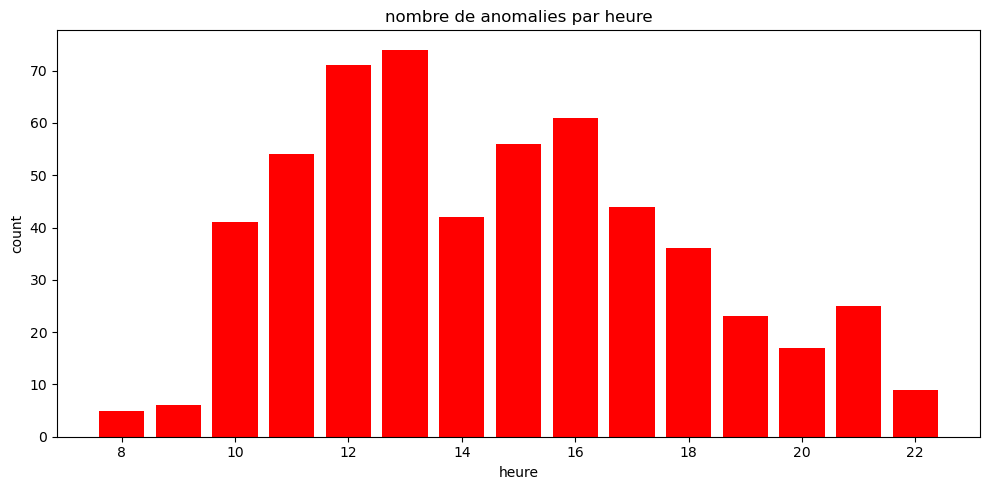

In [95]:
# graph Bar chart for anomalies by customer
plt.figure(figsize=(10, 5))
plt.bar(df_Valeurs_anormales_grouped_heure['Heure'],df_Valeurs_anormales_grouped_heure['Count'],color='red')
plt.title('nombre de anomalies par heure')
plt.xlabel('heure')
plt.ylabel('count')
plt.tight_layout()
plt.show()

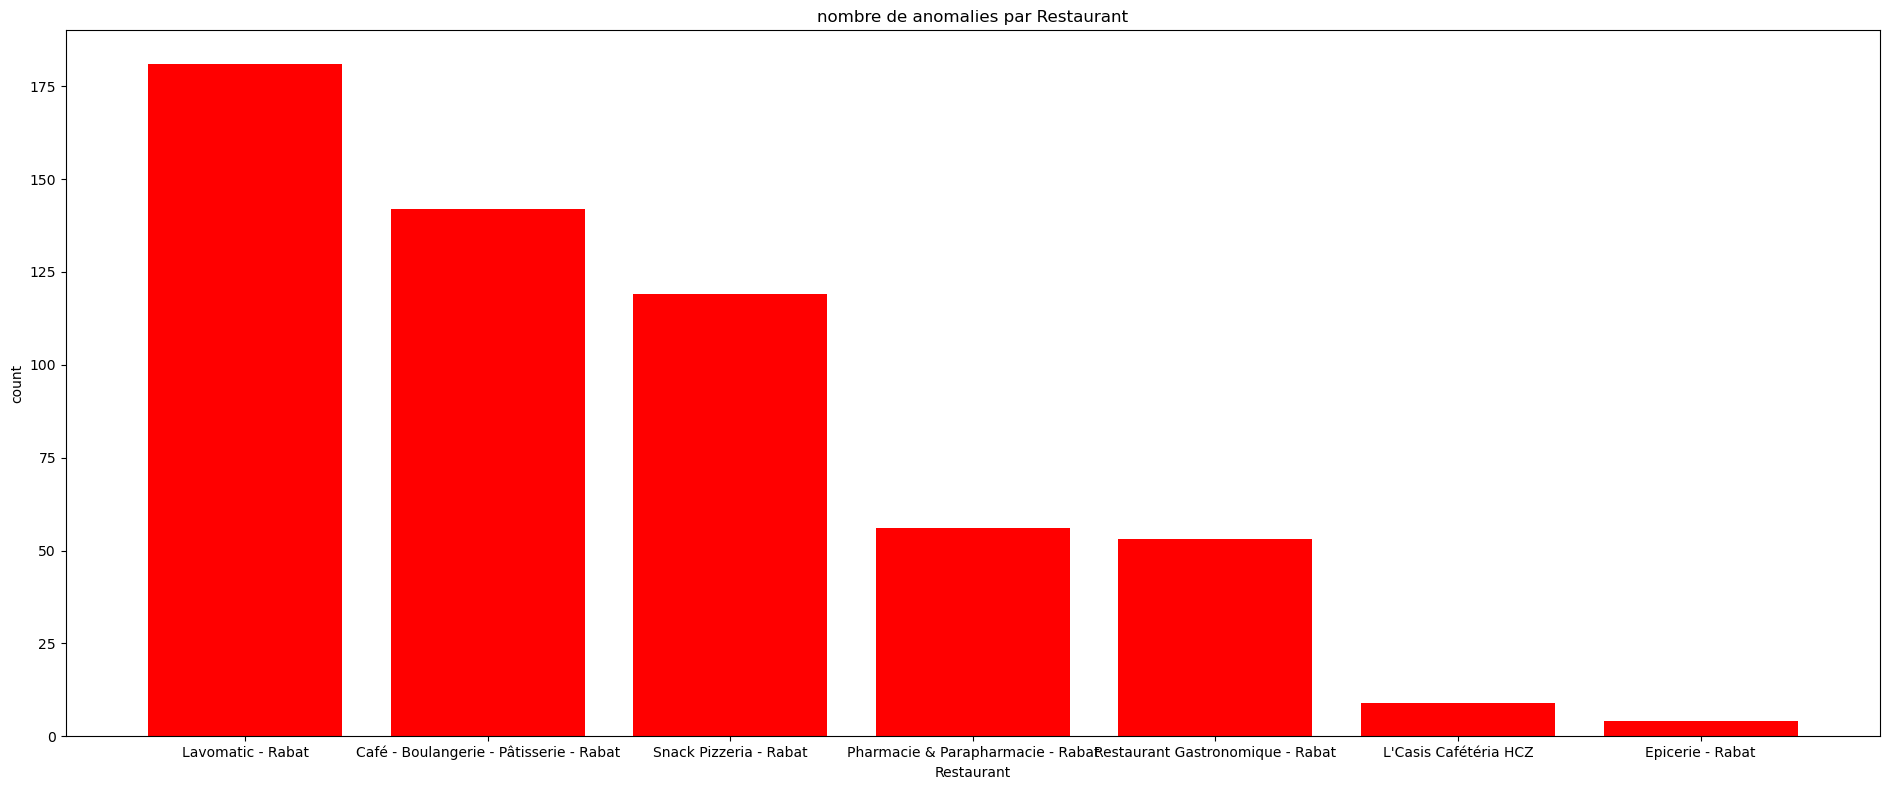

In [97]:
#graph  Bar chart for anomalies by restaurant
plt.figure(figsize=(19, 8))
plt.bar(df_Valeurs_anormales_grouped_restaurant['Restaurant'], df_Valeurs_anormales_grouped_restaurant['Count'],color='red')
plt.title('nombre de anomalies par Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('count')
plt.tight_layout()
plt.show()

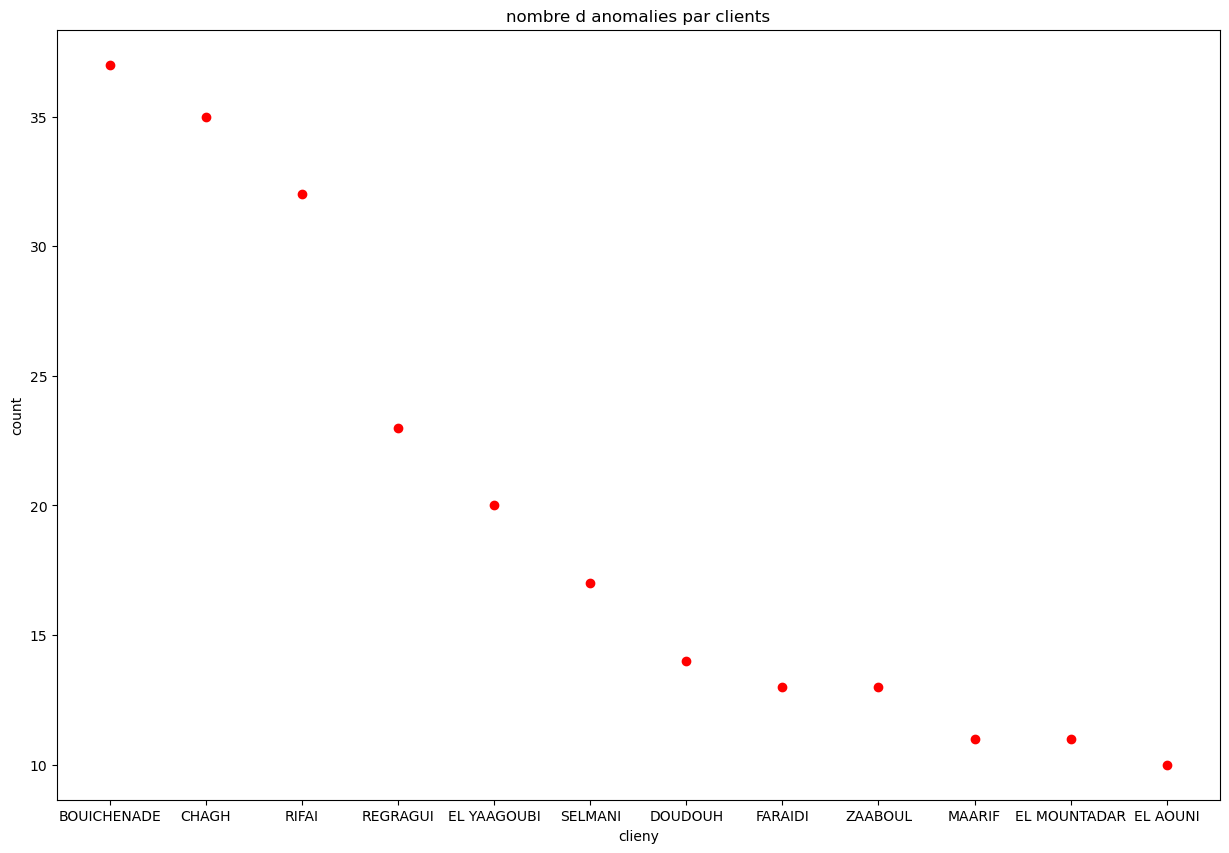

In [99]:
# graph Scatter plot of anomalies
plt.figure(figsize=(15, 10))
plt.scatter(df_Valeurs_anormales_grouped_clients['Bénéficiaire_CPP'], df_Valeurs_anormales_grouped_clients['Count'], color='red')
plt.title('nombre d anomalies par clients')
plt.xlabel('clieny')
plt.ylabel('count')
plt.show()

In [101]:
# Grouper les données par caissier pour analyser le montant total traité et le nombre de transactions effectuées.
grouped_cassier = df.groupby('Prenom User').agg(montant_total_traité=('Montant_Rgl', 'sum'), nombre_transactions=('Montant_Rgl', 'count')).reset_index()
grouped_cassier.head()

,Prenom User,montant_total_traité,nombre_transactions
0,Abdelkarim,9759.500000,515
1,Abdelkrim,2975.300006,204
2,Ayman,4582.000000,235
3,Ayoub,38756.000000,797
4,Fadwa,46274.139999,641


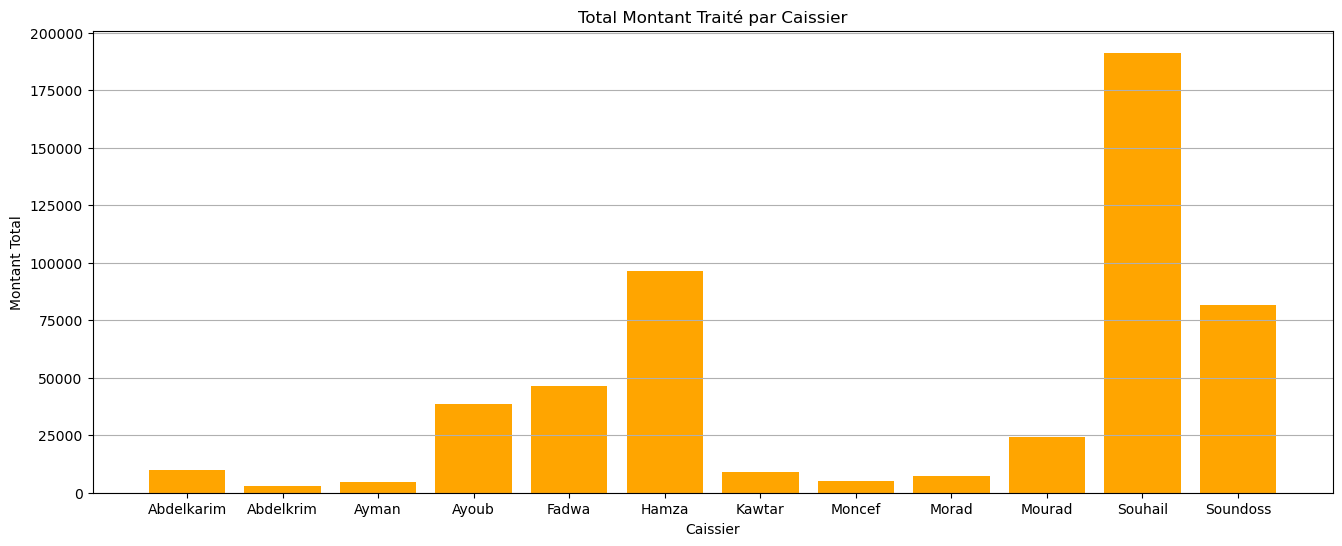

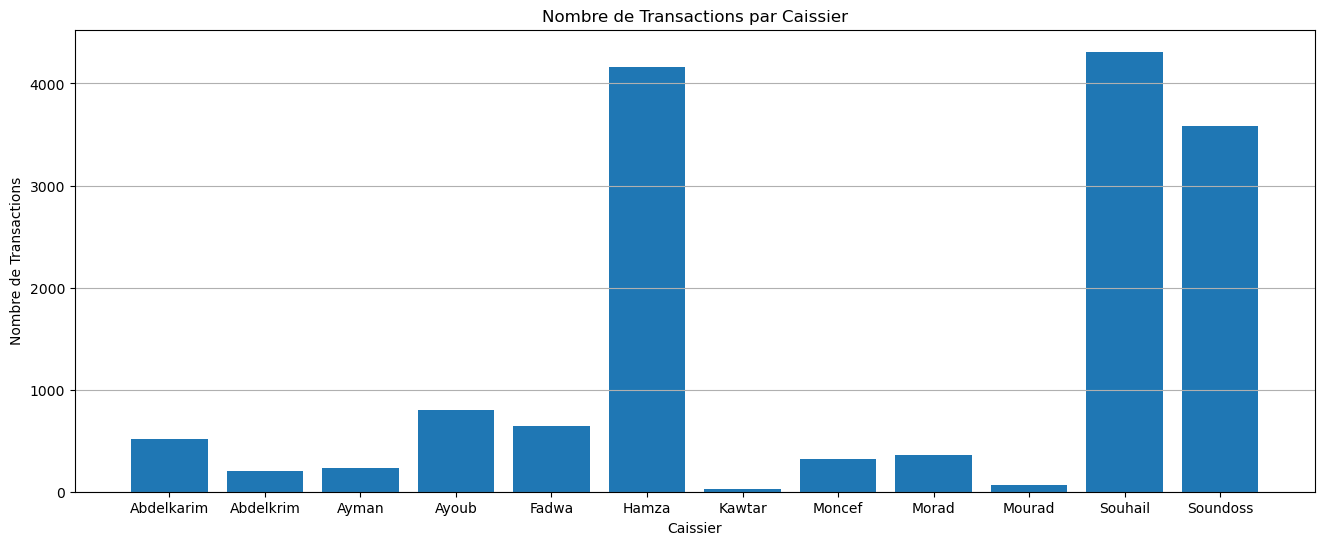

In [103]:
#graph pour visualiser les performances des caissiers
plt.figure(figsize=(16, 6))
plt.bar(grouped_cassier['Prenom User'], grouped_cassier['montant_total_traité'],color='orange')
plt.title("Total Montant Traité par Caissier")
plt.xlabel("Caissier")
plt.ylabel("Montant Total")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(16, 6))
plt.bar(grouped_cassier['Prenom User'], grouped_cassier['nombre_transactions'])
plt.title("Nombre de Transactions par Caissier")
plt.xlabel("Caissier")
plt.ylabel("Nombre de Transactions")
plt.grid(axis='y')
plt.show()

Correlation entre Solde_CPP et Total_Depenses : 0.193290844984565



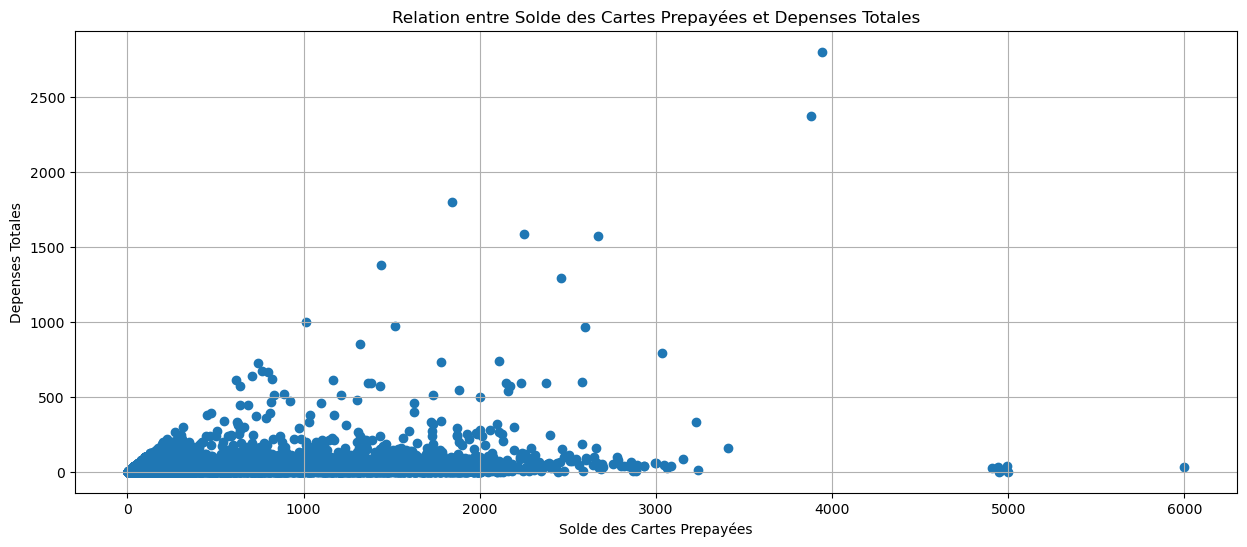

In [104]:
# Calculer la corrélation entre le solde des cartes prépayées et les dépenses des clients.

correlation = df['Solde_CPP'].corr(df['Montant_Rgl'])
print(f"Correlation entre Solde_CPP et Total_Depenses : {correlation}\n")

plt.figure(figsize=(15, 6))
plt.scatter(df['Solde_CPP'], df['Montant_Rgl'])
plt.title("Relation entre Solde des Cartes Prepayées et Depenses Totales")
plt.xlabel("Solde des Cartes Prepayées")
plt.ylabel("Depenses Totales")
plt.grid(True)
plt.show()

In [107]:
 depenses_totales_clients = df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index()
 solde_cartes_prepayées_clients = df.groupby('Bénéficiaire_CPP')['Solde_CPP'].sum().reset_index()
# tableau pour le solde des cartes prépayéeset les dépenses totales pour chaque client
tableau_depenses_soldes_clients = pd.merge( depenses_totales_clients, solde_cartes_prepayées_clients, on='Bénéficiaire_CPP', how='inner')

In [109]:
tableau_depenses_soldes_clients

,Bénéficiaire_CPP,Montant_Rgl,Solde_CPP
0,AABID,259.500000,729.00
1,AABIL,2824.900002,58035.30
2,AARAB,7205.000000,142612.50
3,AARIBECHE,28.000000,130.50
4,AAYLA,184.625000,914.09
...,...,...,...
850,meryem el,108.000000,369.50
851,nassri,33.740000,183.76
852,nouhaila alaoui ait,36.000000,159.00
853,rhazal,30.000000,295.02


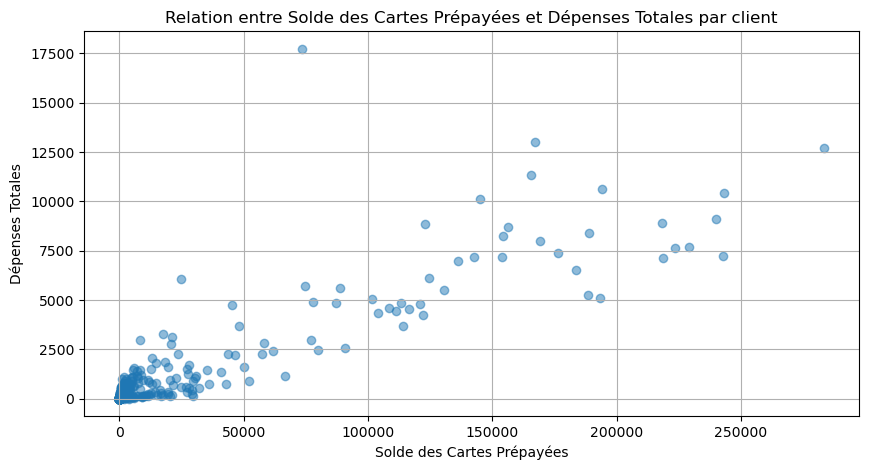

Correlation entre Solde_CPP et Total_Depenses par clients : 0.89911265388839



In [111]:
plt.figure(figsize=(10, 5))
plt.scatter(tableau_depenses_soldes_clients['Solde_CPP'], tableau_depenses_soldes_clients['Montant_Rgl'],alpha=0.5)
plt.title("Relation entre Solde des Cartes Prépayées et Dépenses Totales par client")
plt.xlabel("Solde des Cartes Prépayées")
plt.ylabel("Dépenses Totales")
plt.grid()
plt.show()

correlation =tableau_depenses_soldes_clients['Solde_CPP'].corr(tableau_depenses_soldes_clients['Montant_Rgl'])
print(f"Correlation entre Solde_CPP et Total_Depenses par clients : {correlation}\n")